In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [11]:
import tensorflow

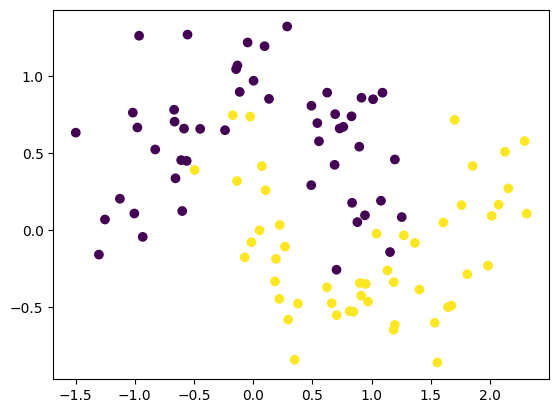

In [17]:
X , y = make_moons(100, noise = 0.25, random_state =2)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

In [56]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=600, validation_split=0.2, verbose=1)

Epoch 1/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.4570 - loss: 0.6425 - val_accuracy: 0.9000 - val_loss: 0.3929
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4454 - val_accuracy: 0.9000 - val_loss: 0.2731
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8820 - loss: 0.3451 - val_accuracy: 0.9000 - val_loss: 0.2024
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8367 - loss: 0.3899 - val_accuracy: 0.9000 - val_loss: 0.2255
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8508 - loss: 0.3680 - val_accuracy: 0.9000 - val_loss: 0.2706
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8078 - loss: 0.4017 - val_accuracy: 0.9000 - val_loss: 0.2565
Epoch 7/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8523 - loss: 0.3166 - val_accuracy: 0.9000 - val_loss: 0.2210
Epoch 8/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8273 - loss: 0.3729 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


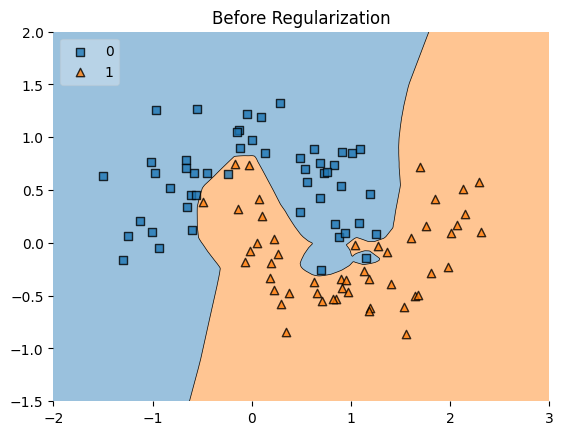

In [59]:
plot_decision_regions(X, y.astype('int'), clf=model, legend= 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title("Before Regularization")
plt.show()

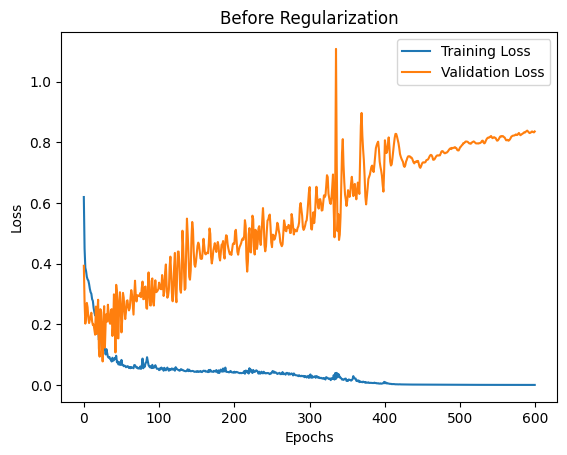

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title('Before Regularization')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


# **After Regularization**

In [30]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model1.fit(X, y, epochs=600, validation_split=0.2, verbose=1)

Epoch 1/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.6875 - loss: 4.2043 - val_accuracy: 0.9000 - val_loss: 2.6643
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8242 - loss: 2.4441 - val_accuracy: 0.9000 - val_loss: 1.4841
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8320 - loss: 1.4077 - val_accuracy: 0.9000 - val_loss: 0.8862
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8328 - loss: 0.8966 - val_accuracy: 0.9000 - val_loss: 0.6543
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8148 - loss: 0.6735 - val_accuracy: 0.9000 - val_loss: 0.5355
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8313 - loss: 0.6478 - val_accuracy: 0.9000 - val_loss: 0.5499
Epoch 7/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8250 - loss: 0.6399 - val_accuracy: 0.9000 - val_loss: 0.5272
Epoch 8/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8469 - loss: 0.6291 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


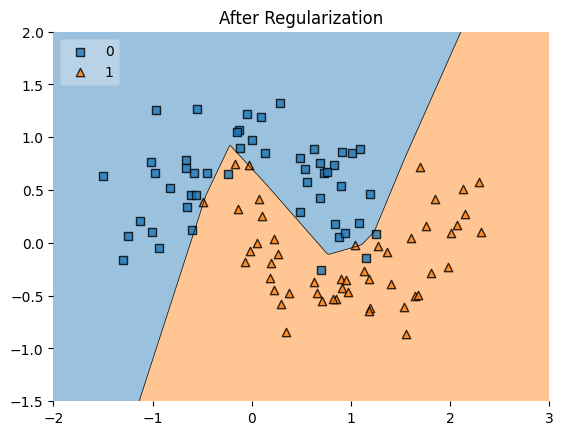

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend= 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title("After Regularization")
plt.show()

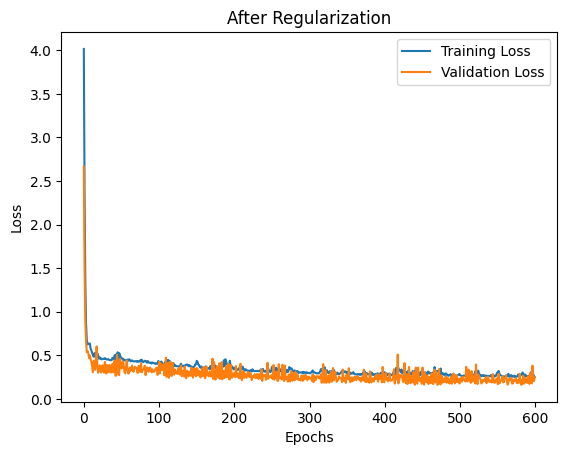

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title('After Regularization')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


In [43]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model1_weight_layer1 = model1.get_weights()[0].reshape(256)


In [44]:
model_weight_layer1

array([ 3.27437431e-01,  4.31211069e-02, -6.08514249e-02, -1.93547979e-01,
       -5.91109730e-02, -3.80053461e-01, -4.51070279e-01, -4.10923839e-01,
       -3.79992157e-01, -3.78670692e-01,  2.87693769e-01, -4.30247635e-01,
       -2.53221065e-01,  2.81890661e-01, -4.86862510e-01, -6.31931648e-02,
        2.62309968e-01,  5.38653135e-02,  1.86534271e-01,  2.81374454e-01,
       -3.78419012e-01, -2.29433849e-02,  6.01951852e-02,  8.18791538e-02,
        7.72247016e-02,  2.49385297e-01,  2.35963583e-01,  4.26891565e-01,
       -1.25108272e-01,  2.40759045e-01,  1.48455203e-02, -1.00792607e-03,
        3.69413719e-02,  1.37066245e-01, -3.93400416e-02, -4.13623363e-01,
        3.09158512e-03, -4.99054939e-01, -9.18992609e-02,  3.76513004e-01,
       -3.86455357e-01, -4.06057119e-01, -1.76775619e-01, -5.05997002e-01,
       -9.89301652e-02,  2.36881182e-01,  1.49481982e-01, -4.86157179e-01,
        2.16067970e-01,  3.00786525e-01,  2.60059953e-01,  1.80995792e-01,
        3.82846296e-01,  

In [45]:
model1_weight_layer1

array([-1.22663787e-29, -1.47531802e-35, -1.27086609e-35, -1.77588383e-35,
       -3.11129659e-01,  3.63901168e-01,  1.51925757e-35,  7.00271982e-17,
        4.41440557e-34, -3.05322891e-37, -2.22910693e-35,  6.94003714e-36,
        9.54422492e-36,  1.29143402e-01,  8.54164533e-36,  1.90404715e-35,
       -1.49769862e-35, -5.71059747e-34,  1.62987558e-35, -1.07212920e-36,
        3.48329842e-01,  9.41224982e-08,  6.03891569e-36, -2.00194716e-02,
       -3.00075928e-36, -8.30272380e-36, -4.42232397e-36, -6.85913989e-23,
       -8.90754951e-36,  2.87255908e-36,  5.94839961e-36, -1.30457832e-35,
       -1.91387441e-35,  4.34519042e-20,  2.26421363e-35,  3.78484285e-36,
       -1.34725227e-35,  1.61796437e-10, -1.38156000e-35,  2.71348408e-30,
        8.39878373e-36, -1.04276279e-35, -3.51424482e-35,  6.72613003e-36,
       -1.83113304e-13,  1.59058591e-35,  1.35786427e-28, -1.06187720e-35,
       -1.25945366e-35,  1.77184967e-36, -1.38367652e-35, -1.79656174e-35,
       -2.27144252e-35, -

<Axes: >

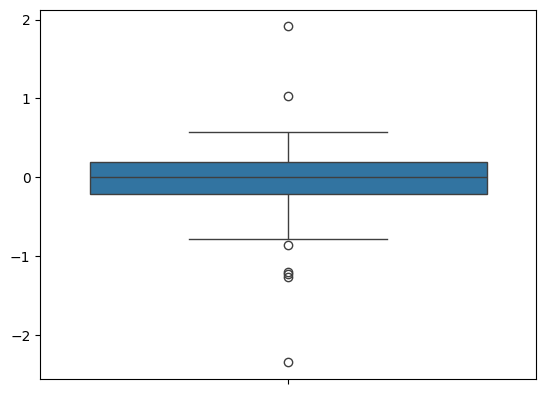

In [46]:
sns.boxplot(model_weight_layer1)

<Axes: >

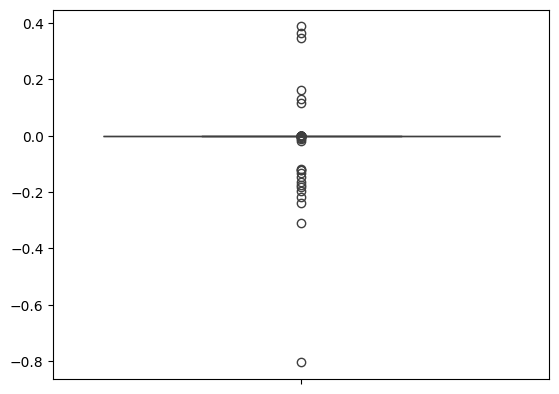

In [47]:
sns.boxplot(model1_weight_layer1)

In [48]:
model_weight_layer1.min()

-2.3496413

In [49]:
model1_weight_layer1.min()

-0.80460167

In [50]:
model_weight_layer1.max()

1.9134763

In [51]:
model1_weight_layer1.max()

0.38810295